<a href="https://www.kaggle.com/code/harshalhonde/salary-dataset-simple-linear-regression?scriptVersionId=124522243" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv


In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
df = pd.read_csv('/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv')

In [4]:
# Display the first 5 rows
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [5]:
# drop the firest column, we have already index column,
df.drop('Unnamed: 0', axis=1,inplace=True)

In [6]:
# Check the dataset shape (Rows, Columns)
df.shape

(30, 2)

In [7]:
# Detailed view of columns structure with dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [8]:
# Let's Look at some statistical information about dataframe.
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [9]:
# Checking null values in dataframe
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

# Visualising Data Using Seaborn

In [10]:
# coventional way to import seaborn
import seaborn as sns

# T0 visualize in the notebook
%matplotlib inline

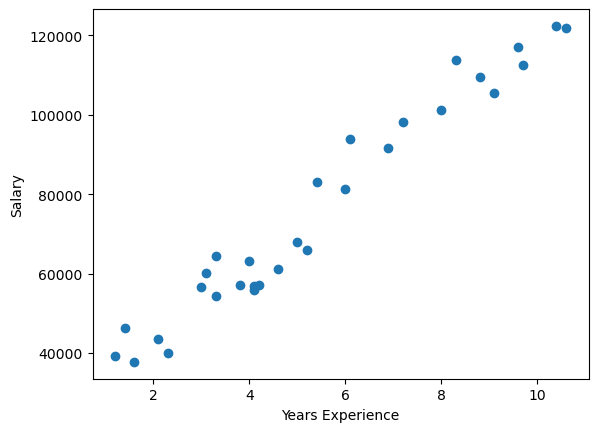

In [11]:
#Visualize the relationship between the features and the response using scatterplot
plt.scatter(x=df['YearsExperience'],y=df['Salary'])
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.show()

In [12]:
X = df[["YearsExperience"]]
y = df[["Salary"]]

#MODEL
model = LinearRegression().fit(X,y)
print("Intercept:", model.intercept_[0])
print("Coefficient:", model.coef_[0][0])

Intercept: 24848.203966523193
Coefficient: 9449.962321455077


In [13]:
#YearsExperience = 4, Salary = ? 
model.intercept_[0] + model.coef_[0][0] * 4

62648.0532523435

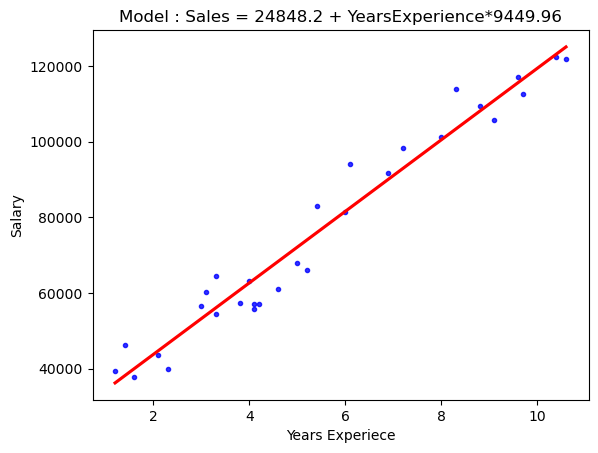

In [14]:
#MODEL VISUALIZATION

fig = sns.regplot(x = X, y = y, scatter_kws ={"color":"b","s":9}, ci = False, color = "r")

fig.set_title(f"Model : Sales = {round(model.intercept_[0], 2)} + YearsExperience*{round(model.coef_[0][0], 2)}")
fig.set_ylabel("Salary")
fig.set_xlabel("Years Experiece")
plt.show()

In [15]:
#Prediction Success
y_hat = model.predict(X)
y_hat

array([[ 36188.15875227],
       [ 38078.15121656],
       [ 39968.14368085],
       [ 44693.12484158],
       [ 46583.11730587],
       [ 53198.09093089],
       [ 54143.08716303],
       [ 56033.07962732],
       [ 56033.07962732],
       [ 60758.06078805],
       [ 62648.05325234],
       [ 63593.04948449],
       [ 63593.04948449],
       [ 64538.04571663],
       [ 68318.03064522],
       [ 72098.0155738 ],
       [ 73988.00803809],
       [ 75878.00050238],
       [ 81547.97789525],
       [ 82492.9741274 ],
       [ 90052.94398456],
       [ 92887.932681  ],
       [100447.90253816],
       [103282.8912346 ],
       [108007.87239533],
       [110842.86109176],
       [115567.84225249],
       [116512.83848464],
       [123127.81210966],
       [125017.80457395]])

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [17]:
MSE = mean_squared_error(y, y_hat)
RMSE = np.sqrt(mean_squared_error(y, y_hat))
MAE = mean_absolute_error(y, y_hat)

print("MSE: ",MSE, '\n',
     "RMSE:",RMSE, '\n',
     "MAE: ",MAE)

print("y_mean: ", y.mean())
print("y_std: ", y.std())

MSE:  31270951.722280953 
 RMSE: 5592.04360876066 
 MAE:  4644.201289443537
y_mean:  Salary    76004.0
dtype: float64
y_std:  Salary    27414.429785
dtype: float64


In [18]:
#R-Square 
model.score(X,y)

0.9569566641435086